Filtered data size: 100000 events with total charge zero
Z boson mass range with ±4.0% uncertainty:
From 87.540 GeV to 94.835 GeV


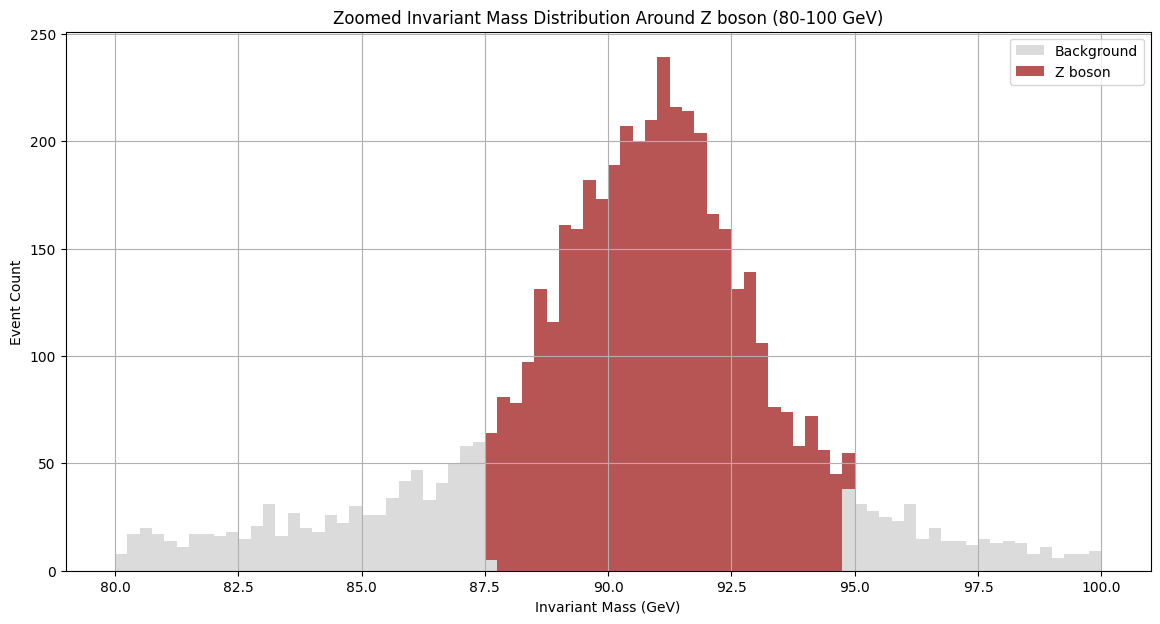

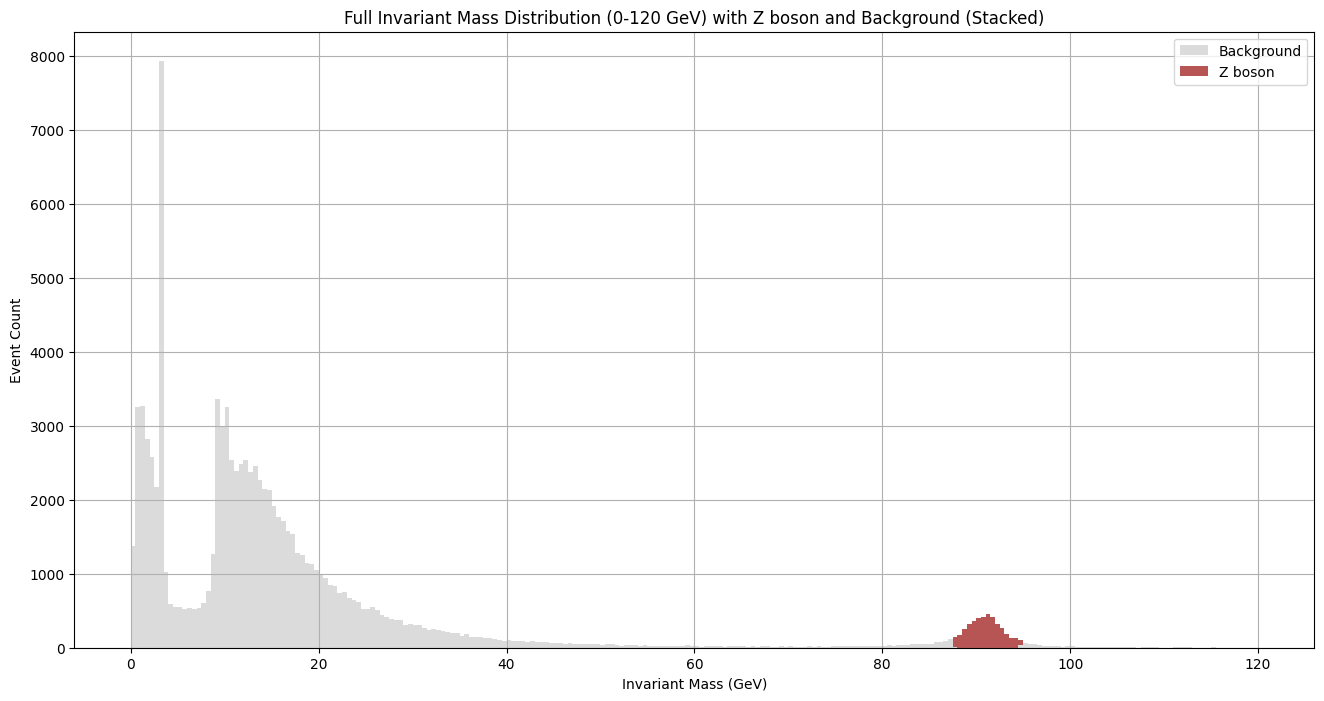

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load and preprocess data ---

data = pd.read_csv('/Users/xDAyN/Desktop/cs project/School Project/Dimuon_DoubleMu.csv')

# Keep only neutral muon pairs
data['Q_total'] = data['Q1'] + data['Q2']
data = data[data['Q_total'] == 0].reset_index(drop=True)

print(f"Filtered data size: {len(data)} events with total charge zero")

# --- Z boson nominal mass and uncertainty ---

mZ_nominal = 91.1876  # GeV
uncertainty_physics = 0.03   # 3%
uncertainty_detector = 0.01  # 1%
total_uncertainty = uncertainty_physics + uncertainty_detector  # 4%

mass_lower = mZ_nominal * (1 - total_uncertainty)
mass_upper = mZ_nominal * (1 + total_uncertainty)

print(f"Z boson mass range with ±{total_uncertainty*100:.1f}% uncertainty:")
print(f"From {mass_lower:.3f} GeV to {mass_upper:.3f} GeV")

# --- First plot: zoomed-in on Z boson region (80-100 GeV) ---

plot_min_zoom = 80
plot_max_zoom = 100
bins_zoom = 80  # 0.25 GeV per bin approx.

events_zoom = data[(data['M'] >= plot_min_zoom) & (data['M'] <= plot_max_zoom)]
is_z_zoom = (events_zoom['M'] >= mass_lower) & (events_zoom['M'] <= mass_upper)
is_bg_zoom = ~is_z_zoom

z_masses_zoom = events_zoom[is_z_zoom]['M']
bg_masses_zoom = events_zoom[is_bg_zoom]['M']

plt.figure(figsize=(14, 7))
plt.hist([bg_masses_zoom, z_masses_zoom], bins=bins_zoom, range=(plot_min_zoom, plot_max_zoom),
         color=['lightgray', 'brown'], alpha=0.8,
         label=['Background', 'Z boson'], stacked=True)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Event Count')
plt.title('Zoomed Invariant Mass Distribution Around Z boson (80-100 GeV)')
plt.legend()
plt.grid(True)
plt.show()

# --- Second plot: full invariant mass range (0-120 GeV) ---

plot_min_full = 0
plot_max_full = 120
bins_full = 240  # 0.5 GeV per bin

events_full = data[(data['M'] >= plot_min_full) & (data['M'] <= plot_max_full)]
is_z_full = (events_full['M'] >= mass_lower) & (events_full['M'] <= mass_upper)
is_bg_full = ~is_z_full

z_masses_full = events_full[is_z_full]['M']
bg_masses_full = events_full[is_bg_full]['M']

plt.figure(figsize=(16, 8))
plt.hist([bg_masses_full, z_masses_full], bins=bins_full, range=(plot_min_full, plot_max_full),
         color=['lightgray', 'brown'], alpha=0.8,
         label=['Background', 'Z boson'], stacked=True)
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Event Count')
plt.title('Full Invariant Mass Distribution (0-120 GeV) with Z boson and Background (Stacked)')
plt.legend()
plt.grid(True)
plt.show()
